<a href="https://colab.research.google.com/github/2015pushkar/-LOAN-ELIGIBILITY-PREDICTION-USING-MACHINE-LEARNING-/blob/main/Loan_Status_Prediction_ML_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Models used
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from xgboost import XGBClassifier
import lightgbm
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score
import operator

In [2]:
df_train = pd.read_csv("/content/train_ctrUa4K.csv")
df_test = pd.read_csv("/content/test_lAUu6dG.csv")

In [3]:
test_original = df_test.copy()

In [4]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_train.shape

(614, 13)

In [6]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
df_test.shape

(367, 12)

In [8]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# Now need to count with missing values

df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

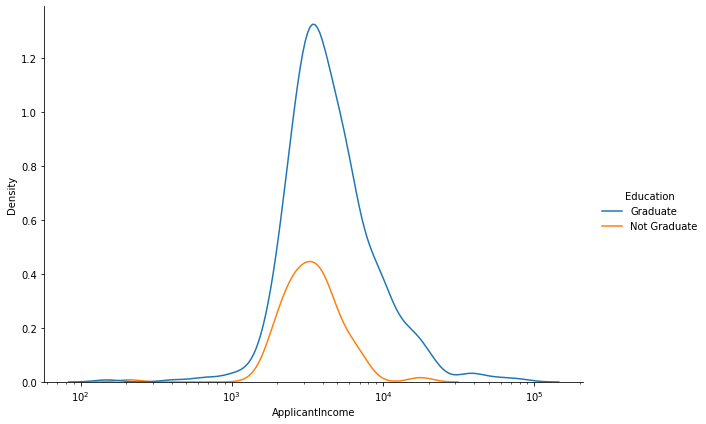

In [11]:
# cannot replace the missing values values with its mean; because several columns are categorical

sns.displot(
  data=df_train,
  x="ApplicantIncome",
  hue="Education",
  kind="kde",
  height=6,
  aspect=1.4,
  log_scale=10
)


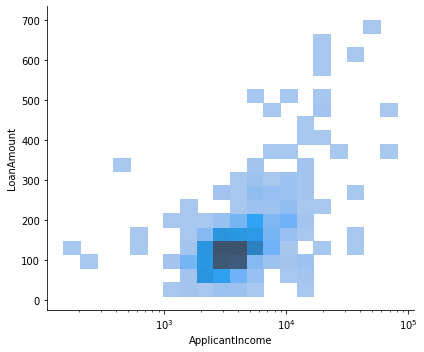

In [12]:
sns.displot(
  data=df_train,
  x="ApplicantIncome",
  y="LoanAmount",
  kind="hist",
  height=5,
  aspect=1.2,
  log_scale=(10,0),
  bins=20
)

In [13]:
df_train.fillna(df_train.mean())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [14]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0],inplace=True)
df_test['Gender'].fillna(df_test['Gender'].mode()[0],inplace=True)

In [15]:
df_train['Married'].fillna(df_train['Married'].mode()[0],inplace=True)
df_test['Married'].fillna(df_test['Married'].mode()[0],inplace=True)

In [16]:
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0],inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0],inplace=True)

In [17]:
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0],inplace=True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0],inplace=True)

In [18]:
df_train.LoanAmount = df_train.LoanAmount.fillna(df_train.LoanAmount.mean())
df_test.LoanAmount = df_test.LoanAmount.fillna(df_test.LoanAmount.mean())

In [19]:
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0],inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mode()[0],inplace=True)

In [20]:
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0],inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0],inplace=True)

In [21]:
#df = df.dropna()

In [22]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [24]:
df_train.shape

(614, 13)

In [25]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [26]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Label encoding Y->1 and N->0

In [27]:
df_train.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [28]:
df_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,0


In [29]:
# Dependent column values

df_train['Dependents'].value_counts() # cannot feed 3+ value to data model, will replace all 3+ values with 4

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [30]:
df_train.replace({"Dependents":{'3+':4}}, inplace=True)
df_test.replace({"Dependents":{'3+':4}}, inplace=True)

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [32]:
df_train['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

Some more Data Visualization

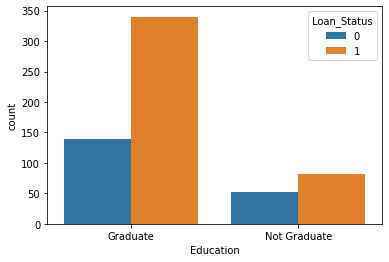

In [33]:
# Education and Loan_status

sns.countplot(x='Education',hue='Loan_Status', data=df_train)

From the above plot we can see, there are higher chances for graduates to get loan

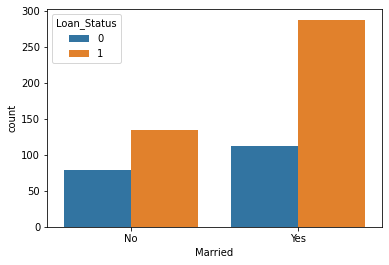

In [34]:
# Marital_status V/s Loan Status

sns.countplot(x='Married', hue='Loan_Status', data=df_train)

From the above chart, we can infer that if a person is married then there is higher chance of getting Loan

If the value is in text, then model cannot understand the data properly

YES -> 1, NO -> 0; 
Graduate -> 1. Not-Graduate -> 0;
Male -> 1, Female -> 0;

In [35]:
df_train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [36]:
# Converting categorical columns to numerical values

df_train.replace({'Married':{'No':0,'Yes':1},
            'Gender':{'Male':1,'Female':0},
            'Self_Employed':{'No':0,'Yes':1},
            'Property_Area':{'Urban':2, 'Semiurban':1,'Rural':0},
            'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)


df_test.replace({'Married':{'No':0,'Yes':1},
            'Gender':{'Male':1,'Female':0},
            'Self_Employed':{'No':0,'Yes':1},
            'Property_Area':{'Urban':2, 'Semiurban':1,'Rural':0},
            'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)



In [37]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [38]:
df_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1
613,LP002990,0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1,0


In [39]:
df_train['Dependents'] = pd.to_numeric(df_train['Dependents'])
df_test['Dependents'] = pd.to_numeric(df_test['Dependents'])

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


Need to remove outliers, as they have an effect on mean

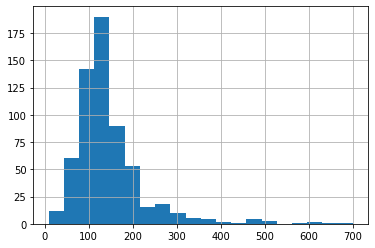

In [41]:
df_train['LoanAmount'].hist(bins=20)

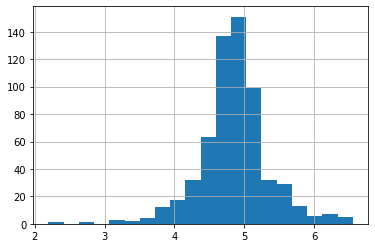

In [42]:
np.log(df_train['LoanAmount']).hist(bins=20)

In [43]:
df_train['LoanAmount_log'] = np.log(df_train['LoanAmount'])
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])

# ML model

In [44]:
# Separating the Data and Label

df_train = df_train.drop(columns=['Loan_ID'], axis=1)
df_test = df_test.drop(columns=['Loan_ID'], axis=1)


In [45]:
X = df_train.drop(columns=['Loan_Status'], axis=1)
Y = df_train['Loan_Status']

In [46]:
print(X)
print(Y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          1              0             5849   
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           4          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [47]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,2,4.700480
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2,4.836282
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2,5.337538
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2,4.605170
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,2,4.356709


In [48]:
# Splitting DataSet into Train and Test data

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=123)
  

In [49]:
print(X.shape,X_train.shape,X_test.shape)

(614, 12) (491, 12) (123, 12)


In [50]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    AdaBoostClassifier(),
    LGBMClassifier()
]

for model in models:
    model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [51]:
model_names = [
    "Logistic Regression train",
    "Support Vector Machine train",
    "Decision Tree train",
    "Neural Network train",
    "Random Forest train",
    "XGBoost train train",
    "K-Nearest Neighbours train",
    "Gaussian Naive Bayes train",
    "AdaBoost Classifier train",
    "Light GBM Classifier train"
]

for model, name in zip(models, model_names):
    print(name + ": {:.4f}%".format(accuracy_score(model.predict(X_train), Y_train) * 100))      #accuracy_score(classifier.predict(X_train), Y_train)

Logistic Regression train: 81.0591%
Support Vector Machine train: 68.8391%
Decision Tree train: 100.0000%
Neural Network train: 62.9328%
Random Forest train: 100.0000%
XGBoost train train: 86.1507%
K-Nearest Neighbours train: 74.1344%
Gaussian Naive Bayes train: 81.0591%
AdaBoost Classifier train: 84.7251%
Light GBM Classifier train: 98.9817%


In [52]:
model_names = [
    "Logistic Regression test",
    "Support Vector Machine test",
    "Decision Tree test",
    "Neural Network test",
    "Random Forest test",
    "XGBoost test",
    "K-Nearest Neighbours test",
    "Gaussian Naive Bayes test",
    "AdaBoost Classifier test",
    "Light GBM Classifier test"
]

scores = []
for model, name in zip(models, model_names):
    print(name + ": {:.4f}%".format(accuracy_score(model.predict(X_test), Y_test) * 100)) 
    scores.append((name,accuracy_score(model.predict(X_test), Y_test)))

scores = dict(scores)
scores = sorted(scores.items(), key=operator.itemgetter(1), reverse=True)
print(scores)

Logistic Regression test: 79.6748%
Support Vector Machine test: 69.1057%
Decision Tree test: 73.1707%
Neural Network test: 57.7236%
Random Forest test: 78.8618%
XGBoost test: 76.4228%
K-Nearest Neighbours test: 61.7886%
Gaussian Naive Bayes test: 79.6748%
AdaBoost Classifier test: 74.7967%
Light GBM Classifier test: 74.7967%
[('Logistic Regression test', 0.7967479674796748), ('Gaussian Naive Bayes test', 0.7967479674796748), ('Random Forest test', 0.7886178861788617), ('XGBoost test', 0.7642276422764228), ('AdaBoost Classifier test', 0.7479674796747967), ('Light GBM Classifier test', 0.7479674796747967), ('Decision Tree test', 0.7317073170731707), ('Support Vector Machine test', 0.6910569105691057), ('K-Nearest Neighbours test', 0.6178861788617886), ('Neural Network test', 0.5772357723577236)]


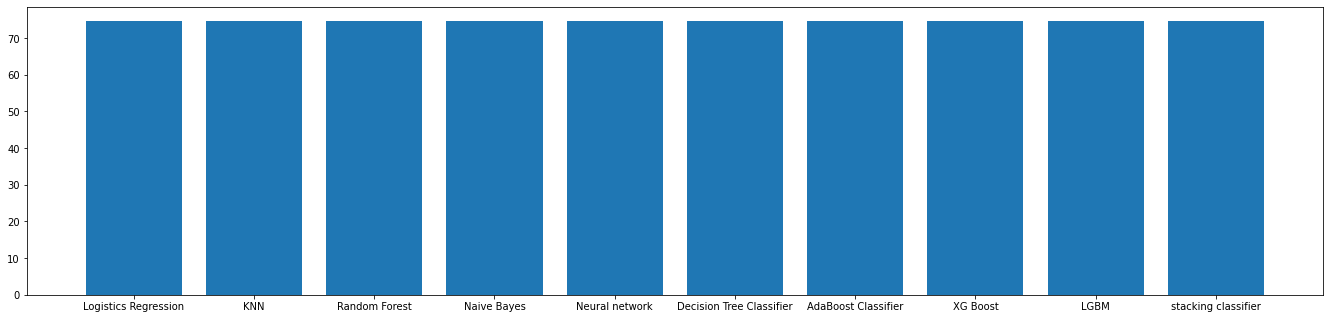

In [67]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
classifier = ['Logistics Regression',
                       'KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'Neural network',
                       'Decision Tree Classifier',
                       'AdaBoost Classifier',
                       'XG Boost',
                       'LGBM',
                       'stacking classifier']

ax.bar(classifier,accuracy_score(model.predict(X_test), Y_test)*100)
plt.show()